In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMG_SIZE = 128
BATCH_SIZE = 16


In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [15]:
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DATA',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 160 images belonging to 4 classes.


In [14]:
val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DATA',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 40 images belonging to 4 classes.


In [9]:
class_indices=train_generator.class_indices
class_names=list(class_indices.keys())
print("class_indices:",class_indices)
print("class_names:",class_names)

class_indices: {'Akshayas': 0, 'Madhavans': 1, 'Sakthis': 2, 'Sarans': 3}
class_names: ['Akshayas', 'Madhavans', 'Sakthis', 'Sarans']


In [10]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(IMG_SIZE,IMG_SIZE, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(4,activation='softmax'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(train_generator,validation_data=val_generator,epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 101s 10s/step - accuracy: 0.1527 - loss: 1.9415 - val_accuracy: 0.2125 - val_loss: 1.3890
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.3647 - loss: 1.3678 - val_accuracy: 0.2625 - val_loss: 1.3941
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4475 - loss: 1.3352 - val_accuracy: 0.2500 - val_loss: 1.4108
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4256 - loss: 1.2117 - val_accuracy: 0.2562 - val_loss: 1.4717
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4613 - loss: 1.1741 - val_accuracy: 0.2500 - val_loss: 1.4415


In [16]:
model.save('/content/drive/MyDrive/DATA.h5')

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/DATA.h5')
print("model loaded")

model loaded


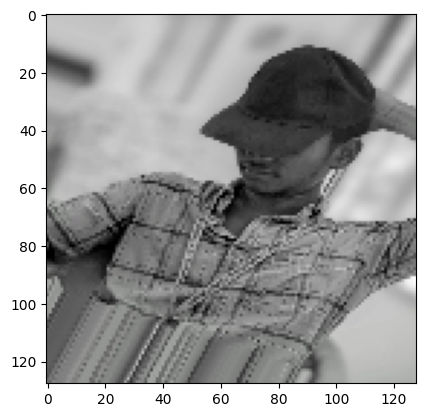

In [20]:
test_image_path="/content/drive/MyDrive/DATA/Madhavans/aug_0_2226.jpg"
img=image.load_img(test_image_path,target_size=(128,128))
plt.imshow(img)
plt.axis()
plt.show()

In [21]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255

In [22]:
perdiction=model.predict(img_array)
ind=np.argmax(perdiction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Madhavans
